<h1 style='background-color:lightgreen'>Student Name:</h1>

<h1 style='background-color:lightblue'>Mohammad Almhiri</h1>

<h1 style='background-color:lightgreen'>Solution of Second of Questions</h1>

<h1 style='background-color:lightgreen'>Variables of First Question</h1>

In [92]:
# for arrays processing
import numpy as np
# for visualization purpose
import matplotlib.pyplot as plt
# all the constants are defined here             
value_of_gravity = 9.81                
ro_w = 986.15           
ro_v = 0.099799         
mu_w = 0.00051198
mu_v = 0.00001065
a = 4*ro_w*value_of_gravity/(3*ro_v)

<h1 style='background-color:lightgreen'>Function CD</h1>

In [93]:
def CD( rho,v,d,mu):
    Re = rho*v*d/mu
    C_d = 24/Re + 2.6*(Re/5)/(1 + (Re/5)**1.52) + 0.411*(Re/263000)**(-7.94)/(1+ (Re/263000)**(-8)) + 0.25*(Re*10**-6)/(1+ Re*10**-6)
    return C_d

<h1 style='background-color:lightgreen'>Function F</h1>

In [94]:
U = 1
def F(dk): return CD(ro_v,U,dk,mu_v)/a

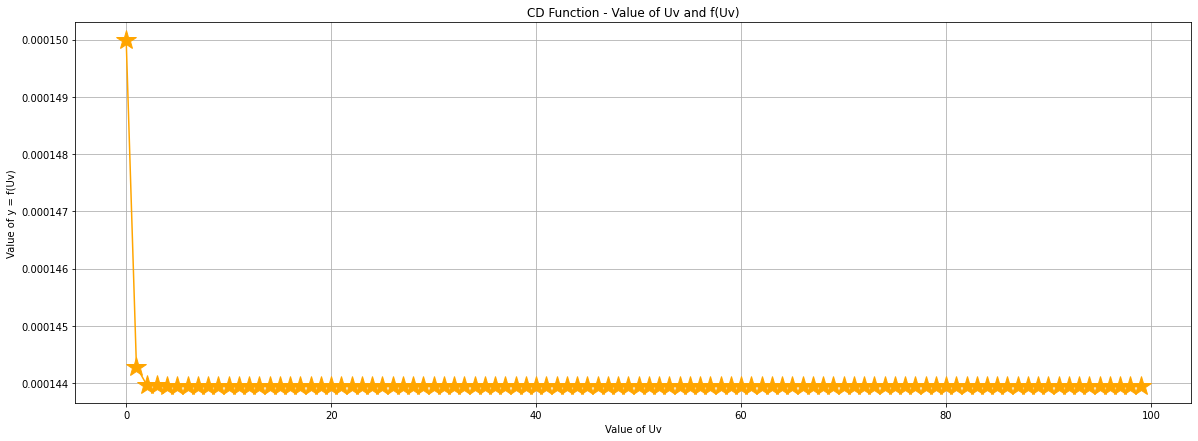

In [95]:
plt.figure(figsize=(20, 7))
D = np.empty(100)
D[0] = 0.00015
c = 0.5
for i in range(1,100):
    D[i] = c*F(D[i-1]) + (1-c)*D[i-1]
plt.plot(range(100), D, marker='*', markersize=20, c='orange')
plt.xlabel("Value of Uv")
plt.ylabel("Value of y = f(Uv)")
plt.grid()
plt.title("CD Function - Value of Uv and f(Uv)")
plt.show()

<h1 style='background-color:lightgreen'>Largest Droplet size</h1>

In [38]:
D[-1]

0.00014395697657224184

<h1 style='background-color:lightgreen'>Third Question</h1>

<h1 style='background-color:lightblue'>B part (a) Gauss method</h1>

In [6]:
print("Important Libraries Loaded")
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sci
import sympy as sym

print("Constants Defined")
Cd = 0.965 
ro = 9998.29
A = 0.004
beta = 0.5
massFlowRate = 20

print("Other values Calculation")
A_tild = 0.01 * A
roTildValues = 0.04 * ro
betaTild = 0.03 * beta
massFlowRateTild = 0.05 * massFlowRate

print("A Tild = ", A_tild)
print("roTildValues = ", roTildValues)
print("betaTild = ", betaTild)
print("massFlowRateTild = ", massFlowRateTild)

Important Libraries Loaded
Constants Defined
Other values Calculation
A Tild =  4e-05
rho_meanTildValues =  399.93160000000006
betaTild =  0.015
massFlowRateTild =  1.0


In [7]:
CD, m, ro_, A_, beta_ = sym.symbols('CD m ro A beta')

dp = ((m/CD/A_)**2)*(1-beta_**4)/2/ro_

dp_m = sym.diff(dp,m)
dp_A = sym.diff(dp,A_)
dp_beta = sym.diff(dp,beta_)
dp_ro = sym.diff(dp,ro_)

dp_std = ((dp_m*massFlowRate)**2 + (dp_A*A_tild)**2 + (dp_beta*betaTild)**2 + (dp_ro*roTildValues)**2)**0.5

dp_std.evalf( subs = {
    CD:Cd,
    m:massFlowRate,
    ro_:ro,
    A_:A,
    beta_:beta
})

2517.92591770695

<h1 style='background-color:lightgreen'>B part (b) Monte Carlo method</h1>

In [28]:
CD = 0.965 
ro = 998.29
A = 0.004
beta = 0.5
massFlowRate = 20
roTildValues = 0.04*ro
A_tild = 0.01*A 
betaTild = 0.03*beta
mass_flow_rate_tilde_value = 0.05*massFlowRate
numsample = 50_000
dpSample = np.empty(numsample)

In [29]:
def F(Cd, m, ro, A, beta):
    x = ((m/Cd/A)**2)*(1-beta**4)/2/ro
    return x[0]

In [30]:
for i in range(numsample):

        mdot_sample = np.random.normal(loc=massFlowRate,
                                  scale=mass_flow_rate_tilde_value,
                                  size=numsample)

        rho_sample = np.random.normal(loc=ro,
                                  scale=roTildValues,
                                  size=numsample)

        A_sample = np.random.normal(loc=A,
                                  scale=A_tild,
                                  size=numsample)

        beta_sample = np.random.normal(loc=beta,
                                  scale=betaTild,
                                  size=numsample)

        dpSample[i] = F(CD, mdot_sample, rho_sample, A_sample, beta_sample)

<h1 style='background-color:lightgreen'>Histogram of Monte Carlo</h1>

In [11]:
!pip install plotly


[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [31]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')

fig = make_subplots(rows=1, cols=1)

fig.add_trace(
    go.Histogram(x=dpSample, nbinsx=90, name='Monte Carlo')
)

fig.update_layout(height=600, width=800, title_text=f'Monte Carlo \n Average = {np.mean(dpSample):.2f}, \n Standard Deviation = {np.std(dpSample)*2:.2f}')
fig.show()

<h1 style='background-color:lightgreen'>Fourth Question</h1>

<h1 style='background-color:lightblue'>Variables of Fourth Question</h1>

In [32]:
rho_value = 1025
mu_value = 0.00109
mass_flow_rate_value = 750
d_value_before = 0.6
eps_value_before = 4.5*1e-3
gravity_value = 9.81
L_value = 400
eta_value = 0.82
rate_value_before = 0.15

<h1 style='background-color:lightblue'>General Flow rate Equation</h1>

In [33]:
def costFunctionForFlowRate(Params):
    d_before,eps_before,rate_before = Params
    v = mass_flow_rate_value / rho_value / (np.pi*d_before**2/4)
    Re = rho_value * v * d_before / mu_value
    log_values = np.log10((eps_before / d_before / 3.7)**(1.11)+(6.9/Re))
    f_value = (-1.8 * log_values)**(-2)
    h_value = f_value * (L_value / d_before) * ((v**2)/(2 * gravity_value))
    return (rho_value * gravity_value * (mass_flow_rate_value / rho_value) * \
            h_value / eta_value / 1000) *(24*365)*rate_before

<h1 style='background-color:lightblue'>(A) Cost of Electricity / Year (Single pipeline)</h1>

In [34]:
cost_value_before_1 = costFunctionForFlowRate([d_value_before, eps_value_before, rate_value_before])
int(round(cost_value_before_1))

92786

<h1 style='background-color:lightblue'>(B)  Estimate how high the raised electricity price</h1>

In [38]:
I_value = 120000     
eps_value_after = 4.5*1e-3
a = 8760*0.10/2
b = 2.5*8760

def get_calculation(eps,d):
    q = mass_flow_rate_value / rho_value
    v = q / (np.pi*d**2/4)
    Re = rho_value*v*d/mu_value
    f = (-1.8*np.log10((eps/d/3.7)**(1.11)+(6.9/Re)))**(-2)
    h = f*L_value*(v**2)/d/2/gravity_value
    P= rho_value*gravity_value*q*h/eta_value / 1000
    return P

pnl = get_calculation(eps_value_after,d_value_before)
pwl = get_calculation(0.2e-3,d_value_before-10e-3)


cf = (I_value-a*(pnl-pwl))/(b*(pnl-pwl))
cf

0.1338906566745461

<h1 style='background-color:lightgreen'>Fifth Question</h1>

<h1 style='background-color:lightblue'>Part (a)</h1>

In [2]:
print("Already provided files loaded")
from utils import *
# import dill

pipes, loops, parameters, Qsd_values, total_nodes, total_pipes = load_networkB()
print("Loaded")

Already provided files loaded
Loaded


In [3]:
pipes

,id,start,end,D,eps,L,k,Q0
0,1.0,0.0,1.0,0.600,0.00040,580.0,616.301147,0.20
1,2.0,1.0,2.0,0.450,0.00040,600.0,2686.642717,0.20
2,3.0,3.0,2.0,0.600,0.00040,600.0,637.552910,0.20
3,4.0,0.0,3.0,0.450,0.00040,430.0,1925.427281,0.20
4,5.0,1.0,4.0,0.600,0.00040,450.0,478.164683,0.00
5,6.0,6.0,4.0,0.600,0.00040,370.0,393.157628,0.00
6,7.0,4.0,5.0,0.450,0.00040,600.0,2686.642717,0.12
7,8.0,6.0,7.0,0.450,0.00040,400.0,1791.095145,0.60
8,9.0,7.0,5.0,0.399,0.00040,500.0,4085.326396,0.00
9,10.0,2.0,5.0,0.600,0.00030,450.0,478.164683,0.00


In [4]:
loops

array([[ 1.,  0.,  0.,  1.,  0.],
       [ 1., -1.,  0.,  0., -1.],
       [-1.,  0.,  0.,  0.,  0.],
       [-1.,  0.,  0., -1.,  0.],
       [ 0.,  1.,  0.,  1.,  1.],
       [ 0.,  0., -1.,  0., -1.],
       [ 0.,  1., -1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 0., -1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  1.,  0.]])

In [5]:
parameters

{'rho': 1000, 'g': 9.81, 'nu': 1.004e-06, 'eta': 0.85}

In [6]:
rho = 1000
g = 9.81
nu = 1.004e-06
eta = 0.85

In [7]:
Qsd_values

{0: 0.4, 1: 0.0, 2: -0.6, 3: -0.2, 4: 0.32, 5: -0.12, 6: 0.8, 7: -0.6}

In [8]:
total_nodes

8

In [9]:
total_pipes

12

In [10]:
n = total_nodes - 1
numloops = loops.shape[1]
A_flows = np.zeros((n, total_pipes))
B_flows = np.zeros(n)

for i in range(n):
    A_flows[i, pipes['start']==i], A_flows[i, pipes['end']==i] = -1, 1
    B_flows[i] = Qsd_values[i]  
b_head = np.zeros(numloops)
b = -np.hstack((B_flows, b_head))
b

array([-0.4 , -0.  ,  0.6 ,  0.2 , -0.32,  0.12, -0.8 , -0.  , -0.  ,
       -0.  , -0.  , -0.  ])

In [11]:
parameters

{'rho': 1000, 'g': 9.81, 'nu': 1.004e-06, 'eta': 0.85}

In [12]:
b.shape

(12,)

In [96]:
values_of_storeQ = np.empty((total_pipes, 20))
values_of_storeQ[:,0] = np.ones(total_pipes)
values_of_error = np.empty((total_pipes, 20))
Q_old_flows = np.ones(total_pipes)
c=0.5
for ii in range(20):  
    f = fhalland(Q_old_flows, pipes, parameters)
    beta = f * abs(Q_old_flows) * pipes['k']
    Aloop = loops.T @ np.diag(beta)
    A = np.vstack((A_flows, Aloop))
    z = np.linalg.solve(A,b)
    q_new_flows = c*z + (1-c)*Q_old_flows
    values_of_error[:,ii], values_of_storeQ[:,ii] = abs(q_new_flows - Q_old_flows), q_new_flows
    Q_old_flows = q_new_flows

In [97]:
Q_old_flows

array([ 0.12 ,  0.253,  0.221,  0.28 , -0.133,  0.213,  0.259,  0.427, -0.173,  0.034,  0.16 ,  0.141])

In [15]:
pipes['Q'] = q_new_flows
pipes['hl'] = beta * q_new_flows
pipes

,id,start,end,D,eps,L,k,Q0,Q,hl
0,1.0,0.0,1.0,0.600,0.00040,580.0,616.301147,0.20,0.119951,0.169935
1,2.0,1.0,2.0,0.450,0.00040,600.0,2686.642717,0.20,0.252842,3.353700
2,3.0,3.0,2.0,0.600,0.00040,600.0,637.552910,0.20,0.221273,0.580798
3,4.0,0.0,3.0,0.450,0.00040,430.0,1925.427281,0.20,0.280050,2.942837
4,5.0,1.0,4.0,0.600,0.00040,450.0,478.164683,0.00,-0.132890,-0.160858
5,6.0,6.0,4.0,0.600,0.00040,370.0,393.157628,0.00,0.213434,0.333685
6,7.0,4.0,5.0,0.450,0.00040,600.0,2686.642717,0.12,0.259319,3.525957
7,8.0,6.0,7.0,0.450,0.00040,400.0,1791.095145,0.60,0.427018,6.324396
8,9.0,7.0,5.0,0.399,0.00040,500.0,4085.326396,0.00,-0.172981,-2.464754
9,10.0,2.0,5.0,0.600,0.00030,450.0,478.164683,0.00,0.033665,0.011399


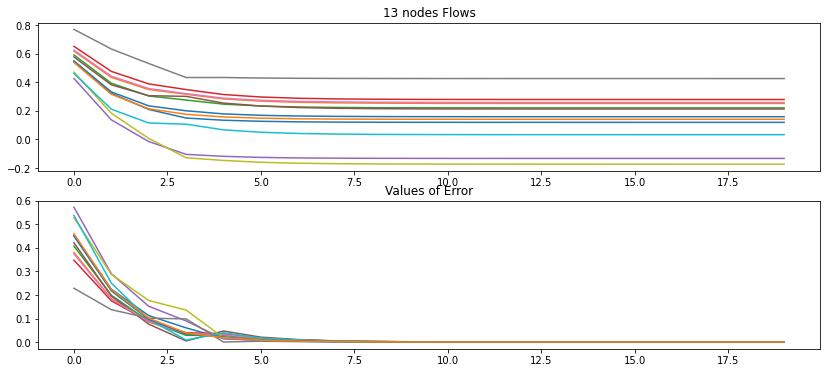

In [16]:
# plotting values
plt.figure(figsize=(14,6))
plt.subplot(211)
plt.plot(range(20), values_of_storeQ.T)
plt.title('13 nodes Flows')

plt.subplot(212)
plt.plot(range(20), values_of_error.T)
plt.title('Values of Error')
plt.show()

<h1 style='background-color:lightblue'>Part B</h1>

In [17]:
Q = pipes['Q']
hl = pipes['hl']
values_of_P = np.zeros(8)
CONST = 200000
values_of_P[0] = CONST / (parameters['rho'] * parameters['g'])
values_of_P[1] = values_of_P[0] - np.sign(Q[1]) * hl[0]
values_of_P[2] = values_of_P[1] - np.sign(Q[2]) * hl[1]
values_of_P[3] = values_of_P[1] - np.sign(Q[3]) * hl[3]
values_of_P[4] = values_of_P[3] + np.sign(Q[4]) * hl[5]
values_of_P[5] = values_of_P[4] - np.sign(Q[5]) * hl[8]
values_of_P[6] = values_of_P[4] - np.sign(Q[6]) * hl[9]
values_of_P[7] = values_of_P[6] - np.sign(Q[7]) * hl[11]

In [18]:
Q

0     0.119951
1     0.252842
2     0.221273
3     0.280050
4    -0.132890
5     0.213434
6     0.259319
7     0.427018
8    -0.172981
9     0.033665
10    0.159551
11    0.141223
Name: Q, dtype: float64

In [19]:
hl

0     0.169935
1     3.353700
2     0.580798
3     2.942837
4    -0.160858
5     0.333685
6     3.525957
7     6.324396
8    -2.464754
9     0.011399
10    3.848244
11    2.933760
Name: hl, dtype: float64

In [20]:
values_of_P

array([20.38735984, 20.21742494, 16.86372497, 17.27458843, 16.94090307,
       19.40565742, 16.92950451, 13.99574457])

In [21]:
P_Pa = values_of_P * parameters['rho'] * parameters['g']
P_Pa

array([200000.        , 198332.93869943, 165433.14198502, 169463.71248352,
       166190.25911979, 190369.49927527, 166078.43920138, 137298.2542364 ])

<h1 style='background-color:lightblue'>Values of Power</h1>

In [22]:
Power1 = P_Pa[0] * Qsd_values[0] / 0.85 / 1000
Power5 = P_Pa[4] * Qsd_values[4] / 0.85 / 1000
Power7 = P_Pa[6] * Qsd_values[6] / 0.85 / 1000

In [23]:
Power1

94.11764705882355

In [24]:
Power5

62.56574460980471

In [25]:
Power7

156.30911924835854

<h1 style='background-color:lightblue'>Values of Energy</h1>

In [26]:
Energy1 = Power1 * 24 
Energy5 = Power5 * 24 
Energy7 = Power7 * 24

In [27]:
Energy1         

2258.8235294117653

In [28]:
Energy5

1501.577870635313

In [29]:
Energy7

3751.4188619606048

In [30]:
def histoGRAM_Plottings(pressures, powers):   
    
    for i in range(N_junctions-1):
        plt.figure()
        plt.hist(pressures[:,i], bins=100, density=True, label='MC')
        plt.title(f'Pressure at Node {i+2} \n Mean of Monte Carlo = {np.mean(pressures[:,i]):.2f}, \n Standard Deviation of Monte Carlo = {np.std(pressures[:,i])}')
        plt.xlabel('value of Pressure [m]')
        plt.ylabel('value of PDF')      
    
    for i in range(1):
        plt.figure()
        plt.hist(powers[:,i+1]/1000, bins=100, density=True, label='MC') #density = True normalizes histogram with
        plt.title(f'Valeu of Pump Power at Node {supply_nodes[i+1]+2} \n Mean of Monte Carlo = \
        {np.mean(powers[:,i+1])/1000:.2f}, \n Standard Deviation of Monte Carlo = {np.std(powers[:,i+1])}')
        plt.xlabel('value of Power [KW]')
        plt.ylabel('Value of PDF')

<h1 style='background-color:lightblue'>Mean Variance Standard Deviation</h1>

In [31]:
def calculateStandardDeviation(pressures, powers):
    std_pressure = [np.std(pressures[:,i]) for i in range(8)]
    std_power = [np.std(powers[:,i]) for i in range(2)]
    return std_pressure, std_power

def calculateVariance(pressures, powers):
    var_pressure = [variance(pressures[:,i]) for i in range(8)]
    var_power = [variance(powers[:,i]) for i in range(2)]
    return var_pressure, var_power

def calculateAverage(pressures, powers):
    mean_pressure = [np.mean(pressures[:,i]) for i in range(8)]
    mean_power = [np.mean(powers[:,i]) for i in range(2)]
    return mean_pressure, mean_power

def plotConverganceGraphs(pressures, powers, I):
    plt.figure(figsize=(14,6))
    plt.subplot(211)
    plt.plot(range(I),[np.mean(pressures[:i,:]) for i in range(I)],linewidth=2)
    plt.subplot(212)
    plt.plot(range(I),[np.mean(powers[:i,:]) for i in range(I)],linewidth=2)

<h1 style='background-color:lightblue'>Part C</h1>

In [32]:
!pip install wntr


[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [33]:
import wntr
N_junctions = 8
N_pipes = 13
eta = 0.85
supply_nodes = [N_junctions-1,3]
rho = 998
g = 9.81
inp_file = 'temp.inp'

<h1 style='background-color:lightblue'>Graph Network</h1>

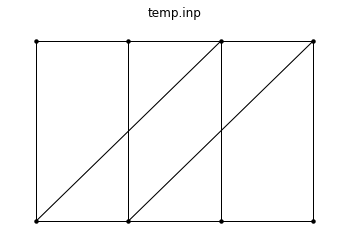

<AxesSubplot:title={'center':'temp.inp'}>

In [34]:
wn = wntr.network.WaterNetworkModel(inp_file)
wntr.graphics.plot_network(wn, title=wn.name)

<h1 style='background-color:lightblue'>Simulation of Hydraylics System</h1>

In [35]:
results0 = wntr.sim.EpanetSimulator(wn).run_sim()
head = results0.node['head']
flowrate = results0.link['flowrate']
demand = results0.node['demand']
headloss = results0.link['headloss']
linktable = pd.DataFrame({'flowrate': flowrate.values[0,:], 'headloss':headloss.values[0,:]})
nodetable = pd.DataFrame({'head':head.values[0,:], 'demand' :demand.values[0,:]})

In [36]:
linktable

,flowrate,headloss
0,0.116247,0.000230
1,0.220829,0.004749
2,0.208620,0.000912
3,0.283753,0.005601
4,-0.104582,0.000218
5,0.159119,0.000428
6,0.249670,0.004966
7,0.485463,0.020288
8,-0.114537,0.010398
9,-0.015132,0.000006


In [37]:
nodetable

,head,demand
0,10.079065,0.00
1,7.202189,0.60
2,7.754500,0.20
3,10.177002,-0.32
4,7.204935,0.12
5,10.339799,-0.80
6,2.155873,0.60
7,10.210000,-0.40


<h1 style='background-color:lightblue'>Part D</h1>

In [38]:
pascal= head * rho * g
pipes

,id,start,end,D,eps,L,k,Q0,Q,hl
0,1.0,0.0,1.0,0.600,0.00040,580.0,616.301147,0.20,0.119951,0.169935
1,2.0,1.0,2.0,0.450,0.00040,600.0,2686.642717,0.20,0.252842,3.353700
2,3.0,3.0,2.0,0.600,0.00040,600.0,637.552910,0.20,0.221273,0.580798
3,4.0,0.0,3.0,0.450,0.00040,430.0,1925.427281,0.20,0.280050,2.942837
4,5.0,1.0,4.0,0.600,0.00040,450.0,478.164683,0.00,-0.132890,-0.160858
5,6.0,6.0,4.0,0.600,0.00040,370.0,393.157628,0.00,0.213434,0.333685
6,7.0,4.0,5.0,0.450,0.00040,600.0,2686.642717,0.12,0.259319,3.525957
7,8.0,6.0,7.0,0.450,0.00040,400.0,1791.095145,0.60,0.427018,6.324396
8,9.0,7.0,5.0,0.399,0.00040,500.0,4085.326396,0.00,-0.172981,-2.464754
9,10.0,2.0,5.0,0.600,0.00030,450.0,478.164683,0.00,0.033665,0.011399


In [39]:
I = 200
def simulateMonteCarloProcess(wn, derr, lerr, do_eps, I):   
    All_Pressure = np.empty((I, N_junctions))
    Pump_Power = np.empty((I,2))  
    d_mean = wn.query_link_attribute('diameter').to_numpy()
    l_mean = wn.query_link_attribute('length').to_numpy()
    eps_mean = wn.query_link_attribute('roughness').to_numpy() 
    for i in range(I):
        count = 0
        for pipe_name, pipe in wn.pipes():
            pipe.diameter = np.random.uniform((1-derr)*d_mean[count], (1+derr)*d_mean[count])
            pipe.length = np.random.uniform((1-lerr)*l_mean[count], (1+lerr)*l_mean[count])
            if do_eps:
                pipe.roughness = np.random.normal(eps_mean[count], eps_mean[count]/5)
            count = count + 1       
        results = wntr.sim.EpanetSimulator(wn).run_sim() 
        head = results.node['head'] # [m]
        demand = results.node['demand'] # [m^3/s]
        All_Pressure[i,:] = pd.Series.to_numpy(head.loc[0,:]) 
        demand_list = pd.Series.to_numpy(demand.loc[0,:])
        for ii in range(2):
            Pump_Power[i,ii] = All_Pressure[i, supply_nodes[ii]]*rho*g*abs(demand_list[supply_nodes[ii]])/eta         
    return(All_Pressure, Pump_Power)

<h1 style='background-color:lightblue'>Monte Carlo Simulation Started</h1>

In [40]:
wn = wntr.network.WaterNetworkModel(inp_file)
pressures_powers = simulateMonteCarloProcess(wn, 0.02, 0.01, True, I)

c:\Users\LAPTOP WORLD\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\LAPTOP WORLD\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


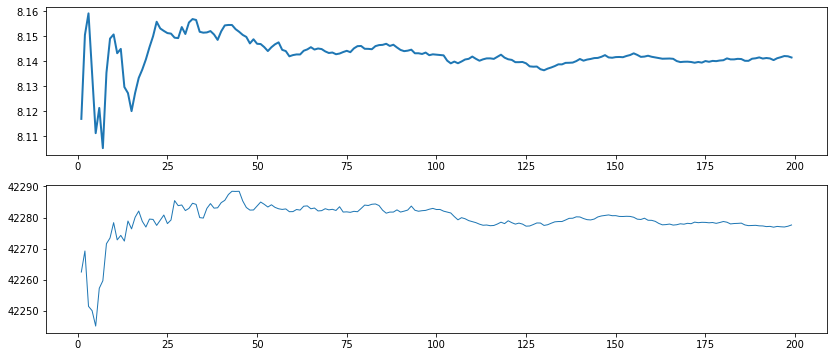

In [41]:
plt.figure(figsize=(14,6))
plt.subplot(211)
plt.plot(range(I), [np.mean(pressures_powers[0][:i,]) for i in range(I)], linewidth=2)
plt.subplot(212)
plt.plot(range(I),[np.mean(pressures_powers[1][:i,:]) for i in range(I)],linewidth=1)

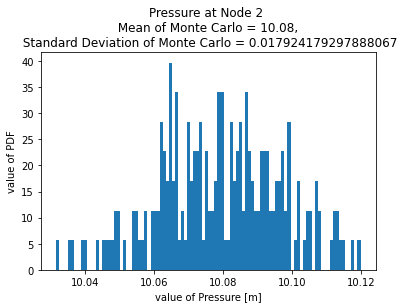

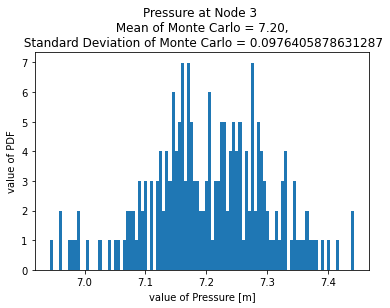

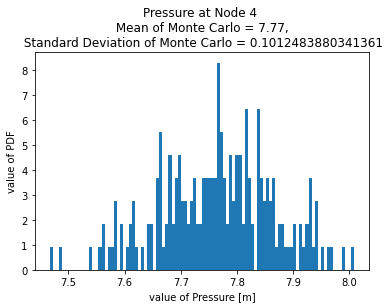

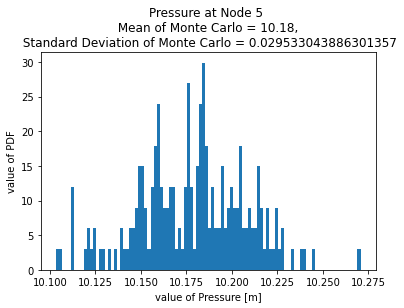

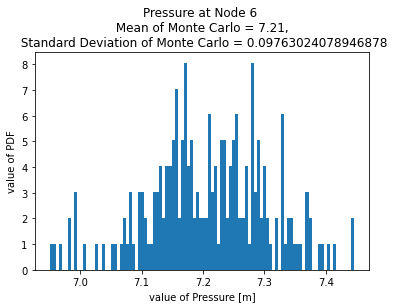

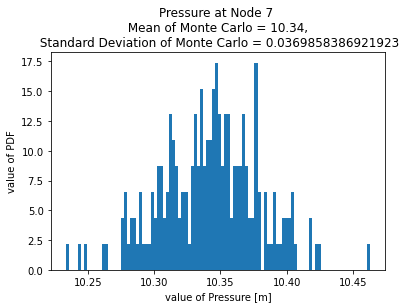

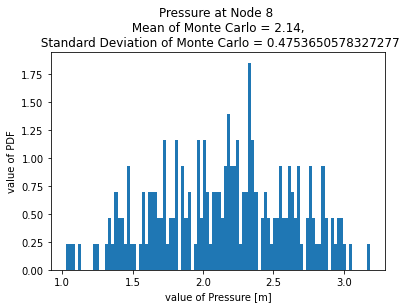

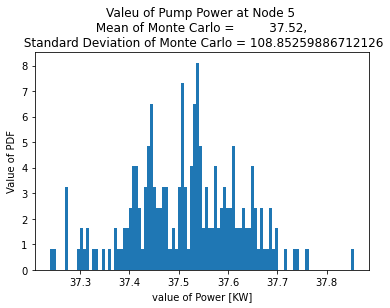

In [42]:
histoGRAM_Plottings(pressures_powers[0], pressures_powers[1])

In [43]:
pressure_conv = np.empty((I, 8))
power_conv = np.empty((I, 2))
for i in range(I):
    pressure_conv[i,:] = np.mean(pressures_powers[0][:i,:])
    power_conv[i,:] = np.mean(pressures_powers[1][:i,:])

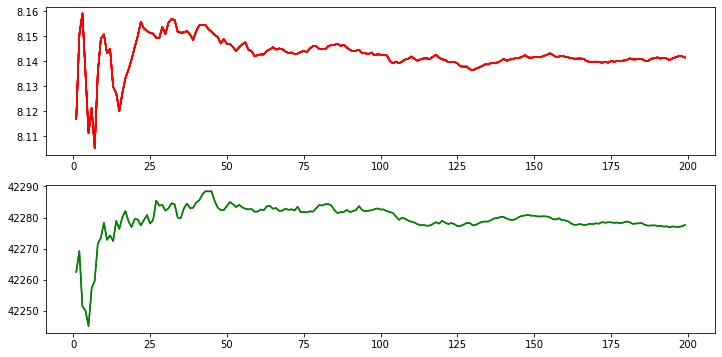

In [45]:
plt.figure(figsize=(12, 6))
plt.subplot(211)
plt.plot(pressure_conv, c='r')
plt.subplot(212)
plt.plot(power_conv, c='g')

<h1 style='background-color:lightblue'>Part E</h1>

In [46]:
from statistics import variance
mean_pressure_mean_power = calculateAverage(pressures_powers[0], pressures_powers[1])
var_pressure_var_power = calculateVariance(pressures_powers[0], pressures_powers[1])
std_pressure_std_power = calculateStandardDeviation(pressures_powers[0], pressures_powers[1])

In [47]:
df_pressure_mean = pd.DataFrame(data=np.array(mean_pressure_mean_power[0]).reshape(-1, 1), columns=["Temperature - 20"])
df_power_mean = pd.DataFrame(data=np.array(mean_pressure_mean_power[1]).reshape(-1, 1), columns=["Temperature - 20"])

df_pressure_var = pd.DataFrame(data=np.array(var_pressure_var_power[0]).reshape(-1, 1), columns=["Temperature - 20"])
df_power_var = pd.DataFrame(data=np.array(var_pressure_var_power[1]).reshape(-1, 1), columns=["Temperature - 20"])

df_pressure_std = pd.DataFrame(data=np.array(std_pressure_std_power[0]).reshape(-1, 1), columns=["Temperature - 20"])
df_power_std = pd.DataFrame(data=np.array(std_pressure_std_power[1]).reshape(-1, 1), columns=["Temperature - 20"])

In [48]:
df_pressure_mean

,Temperature - 20
0,10.079113
1,7.204085
2,7.765314
3,10.178307
4,7.207277
5,10.341767
6,2.143258
7,10.210000


In [50]:
df_power_mean

,Temperature - 20
0,47039.897253
1,37515.102426


In [51]:
df_pressure_var

,Temperature - 20
0,0.000323
1,0.009582
2,0.010303
3,0.000877
4,0.009580
5,0.001375
6,0.227107
7,0.000000


In [52]:
df_power_var

,Temperature - 20
0,0.000000
1,11908.430432


In [53]:
df_pressure_std

,Temperature - 20
0,0.017924
1,0.097641
2,0.101248
3,0.029533
4,0.097630
5,0.036986
6,0.475365
7,0.000000


In [54]:
df_power_std

,Temperature - 20
0,7.275958e-12
1,1.088526e+02


<h1 style='background-color:lightblue'>Put Temperature = 5 Degree</h1>

In [55]:
wn = wntr.network.WaterNetworkModel(inp_file)
rho = 999.93  #[kg/m^3]
wn.options.hydraulic.specific_gravity = 999.93/1000
wn.options.hydraulic.viscosity = 1.519 * 1e-6 /1.004 * 1e-6
Pressure_Power = simulateMonteCarloProcess(wn,0.02,0.02,True,I)
mean_pressure, mean_power = calculateAverage(Pressure_Power[0], Pressure_Power[1])
var_pressure, var_power = calculateVariance(Pressure_Power[0], Pressure_Power[1])
std_pressure, std_power = calculateStandardDeviation(Pressure_Power[0], Pressure_Power[1])
df_pressure_var['Temperature - 5'] = var_pressure
df_power_var['Temperature - 5'] = var_power
df_pressure_std['Temperature - 5'] = std_pressure
df_power_std['Temperature - 5'] = std_power
df_pressure_mean['Temperature - 5'] = mean_pressure
df_power_mean['Temperature - 5'] = mean_power

<h1 style='background-color:lightblue'>Put Temperature = 30 Degree</h1>

In [56]:
wn = wntr.network.WaterNetworkModel(inp_file)
rho = 995.65 #[kg/m^3]
wn.options.hydraulic.specific_gravity = 995.65/1000 
wn.options.hydraulic.viscosity = 0.7978 * 1e-6 /1.004 * 1e-6 
Pressure_Power = simulateMonteCarloProcess(wn,0.02,0.02,True,I)
mean_pressure, mean_power = calculateAverage(Pressure_Power[0], Pressure_Power[1])
var_pressure, var_power = calculateVariance(Pressure_Power[0], Pressure_Power[1])
std_pressure, std_power = calculateStandardDeviation(Pressure_Power[0], Pressure_Power[1])
df_pressure_var['Temperature - 30'] = var_pressure
df_power_var['Temperature - 30'] = var_power
df_pressure_std['Temperature - 30'] = std_pressure
df_power_std['Temperature - 30'] = std_power
df_pressure_mean['Temperature - 30'] = mean_pressure
df_power_mean['Temperature - 30'] = mean_power

In [57]:
df_pressure_var

,Temperature - 20,Temperature - 5,Temperature - 30
0,0.000323,0.000382,0.000326
1,0.009582,0.009036,0.009365
2,0.010303,0.009179,0.010015
3,0.000877,0.000763,0.000831
4,0.009580,0.009239,0.009421
5,0.001375,0.001301,0.001676
6,0.227107,0.221533,0.268499
7,0.000000,0.000000,0.000000


In [58]:
df_pressure_std

,Temperature - 20,Temperature - 5,Temperature - 30
0,0.017924,0.019508,0.018004
1,0.097641,0.094819,0.096532
2,0.101248,0.095569,0.099823
3,0.029533,0.027559,0.028752
4,0.097630,0.095879,0.096819
5,0.036986,0.035981,0.040834
6,0.475365,0.469494,0.516871
7,0.000000,0.000000,0.000000


In [59]:
df_pressure_mean

,Temperature - 20,Temperature - 5,Temperature - 30
0,10.079113,10.076374,10.073715
1,7.204085,7.403998,7.636147
2,7.765314,7.872197,8.055772
3,10.178307,10.155192,10.156680
4,7.207277,7.409981,7.641599
5,10.341767,10.329587,10.368798
6,2.143258,1.681574,1.391602
7,10.210000,10.210000,10.210000


In [60]:
df_power_var

,Temperature - 20,Temperature - 5,Temperature - 30
0,0.000000,0.000000,0.00000
1,11908.430432,10410.096763,11234.00756


In [61]:
df_power_std

,Temperature - 20,Temperature - 5,Temperature - 30
0,7.275958e-12,7.275958e-12,7.275958e-12
1,1.088526e+02,1.017745e+02,1.057253e+02


In [62]:
df_power_mean

,Temperature - 20,Temperature - 5,Temperature - 30
0,47039.897253,47130.866193,46929.131964
1,37515.102426,37502.290102,37347.239163


<h1 style='background-color:lightgreen'>Part F</h1>

<h1 style='background-color:lightblue'>Removing Diamter Uncertainity</h1>

In [63]:
wn = wntr.network.WaterNetworkModel(inp_file)
Pressure_Power = simulateMonteCarloProcess(wn,0.02,0.02,True,I)
mean_pressure, mean_power = calculateAverage(Pressure_Power[0], Pressure_Power[1])
var_pressure, var_power = calculateVariance(Pressure_Power[0], Pressure_Power[1])
std_pressure, std_power = calculateStandardDeviation(Pressure_Power[0], Pressure_Power[1])
df_pressure_var['No diam'] = var_pressure
df_power_var['No diam'] = var_power
df_pressure_std['No diam'] = std_pressure
df_power_std['No diam'] = std_power
df_pressure_mean['No diam'] = mean_pressure
df_power_mean['No diam'] = mean_power

<h1 style='background-color:lightblue'>Removing Length Uncertainity</h1>

In [65]:
wn = wntr.network.WaterNetworkModel(inp_file)
Pressure_Power = simulateMonteCarloProcess(wn,0.02,0.02,True,I)
mean_pressure, mean_power = calculateAverage(Pressure_Power[0], Pressure_Power[1])
var_pressure, var_power = calculateVariance(Pressure_Power[0], Pressure_Power[1])
std_pressure, std_power = calculateStandardDeviation(Pressure_Power[0], Pressure_Power[1])
df_pressure_var['No length'] = var_pressure
df_power_var['No length'] = var_power
df_pressure_std['No length'] = std_pressure
df_power_std['No length'] = std_power
df_pressure_mean['No length'] = mean_pressure
df_power_mean['No length'] = mean_power

<h1 style='background-color:lightblue'>Removing Roughness Uncertainity</h1>

In [66]:
wn = wntr.network.WaterNetworkModel(inp_file)
Pressure_Power = simulateMonteCarloProcess(wn,0.02,0.02,False,I)
mean_pressure, mean_power = calculateAverage(Pressure_Power[0], Pressure_Power[1])
var_pressure, var_power = calculateVariance(Pressure_Power[0], Pressure_Power[1])
std_pressure, std_power = calculateStandardDeviation(Pressure_Power[0], Pressure_Power[1])
df_pressure_var['No rough'] = var_pressure
df_power_var['No rough'] = var_power
df_pressure_std['No rough'] = std_pressure
df_power_std['No rough'] = std_power
df_pressure_mean['No rough'] = mean_pressure
df_power_mean['No rough'] = mean_power

<h1 style='background-color:lightblue'>Display All Results</h1>

In [67]:
df_pressure_var

,Temperature - 20,Temperature - 5,Temperature - 30,No diam,No length,No rough
0,0.000323,0.000382,0.000326,0.000342,0.000252,0.000146
1,0.009582,0.009036,0.009365,0.007707,0.010104,0.007143
2,0.010303,0.009179,0.010015,0.007791,0.010632,0.006856
3,0.000877,0.000763,0.000831,0.000792,0.001036,0.000793
4,0.009580,0.009239,0.009421,0.007834,0.010148,0.007140
5,0.001375,0.001301,0.001676,0.001846,0.002289,0.001563
6,0.227107,0.221533,0.268499,0.275600,0.350820,0.186038
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [68]:
df_pressure_std

,Temperature - 20,Temperature - 5,Temperature - 30,No diam,No length,No rough
0,0.017924,0.019508,0.018004,0.018435,0.015840,0.012037
1,0.097641,0.094819,0.096532,0.087569,0.100268,0.084306
2,0.101248,0.095569,0.099823,0.088046,0.102851,0.082594
3,0.029533,0.027559,0.028752,0.028066,0.032111,0.028085
4,0.097630,0.095879,0.096819,0.088288,0.100484,0.084286
5,0.036986,0.035981,0.040834,0.042853,0.047728,0.039431
6,0.475365,0.469494,0.516871,0.523662,0.590818,0.430242
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [69]:
df_pressure_mean

,Temperature - 20,Temperature - 5,Temperature - 30,No diam,No length,No rough
0,10.079113,10.076374,10.073715,10.080734,10.106258,10.111849
1,7.204085,7.403998,7.636147,7.643655,7.423001,7.487405
2,7.765314,7.872197,8.055772,8.079196,7.933900,8.052729
3,10.178307,10.155192,10.156680,10.169647,10.238132,10.273709
4,7.207277,7.409981,7.641599,7.650465,7.422996,7.487281
5,10.341767,10.329587,10.368798,10.411604,10.494395,10.543952
6,2.143258,1.681574,1.391602,1.173911,0.200139,0.802282
7,10.210000,10.210000,10.210000,10.210000,10.210000,10.210000


In [70]:
df_power_var

,Temperature - 20,Temperature - 5,Temperature - 30,No diam,No length,No rough
0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
1,11908.430432,10410.096763,11234.00756,10703.936574,14012.064541,10718.281532


In [71]:
df_power_std

,Temperature - 20,Temperature - 5,Temperature - 30,No diam,No length,No rough
0,7.275958e-12,7.275958e-12,7.275958e-12,7.275958e-12,7.275958e-12,7.275958e-12
1,1.088526e+02,1.017745e+02,1.057253e+02,1.032009e+02,1.180763e+02,1.032700e+02


In [72]:
df_power_mean

,Temperature - 20,Temperature - 5,Temperature - 30,No diam,No length,No rough
0,47039.897253,47130.866193,46929.131964,46929.131964,46929.131964,46929.131964
1,37515.102426,37502.290102,37347.239163,37394.920841,37646.747977,37777.567740


<h1 style='background-color:lightgreen'>Part G</h1>

<h1 style='background-color:lightblue'>Viscous Length Scale</h1>

In [73]:
ro = 1000
nu = 1.004
damage_threshold = 10
eps_coating = 100 * 0.000001

In [74]:
print("Pipe 1:- Values")
ta_1 = (abs(P_Pa[0]-P_Pa[1])*(pipes['D'][0]/2))/(2*pipes['L'][0]) 
viscous_length_1 = nu * (ro / ta_1)**0.5 * 1e6
viscous_length_1_five= viscous_length_1 * 5
viscous_length_1_five

Pipe 1:- Values


241766598.0473374

In [75]:
print("Pipe 2:- Values")
ta_2 = (abs(P_Pa[1]-P_Pa[2])*(pipes['D'][1]/2))/(2*pipes['L'][1]) 
viscous_length_2 = nu * (ro / ta_2)**0.5*1e6
viscous_length_2_five= viscous_length_2 * 5
viscous_length_2_five

Pipe 2:- Values


63915541.677512564

In [76]:
print("Pipe 3:- Values")
ta_3 = (abs(P_Pa[0]-P_Pa[2])*(pipes['D'][2]/2))/(2*pipes['L'][2])
viscous_length_3 = nu * (ro / ta_3)**0.5*1e6
viscous_length_3_five= viscous_length_3 * 5
viscous_length_3_five

Pipe 3:- Values


54001243.42364859

In [77]:
print("Pipe 4:- Values")
ta_4 = (abs(P_Pa[1]-P_Pa[3])*(pipes['D'][3]/2))/(2*pipes['L'][3])
viscous_length_4 = nu * (ro / ta_4)**0.5*1e6
viscous_length_4_five = viscous_length_4 * 5
viscous_length_4_five

Pipe 4:- Values


57762251.335364394

In [78]:
print("Pipe 5:- Values")
ta_5 = (abs(P_Pa[2]-P_Pa[3])*(pipes['D'][4]/2))/(2*pipes['L'][4])
viscous_length_5 = nu * (ro/ta_5)**0.5*1e6
viscous_length_5_five = viscous_length_5 * 5
viscous_length_5_five

Pipe 5:- Values


136956006.40225458

In [79]:
print("Pipe 6:- Values")
ta_6 = (abs(P_Pa[4]-P_Pa[3])*(pipes['D'][5]/2))/(2*pipes['L'][5]) 
viscous_length_6 = nu * (ro / ta_6)**0.5*1e6
viscous_length_6_five = viscous_length_6 * 5
viscous_length_6_five

Pipe 6:- Values


137802111.01447886

In [80]:
print("Pipe 7:- Values")
ta_7 = (abs(P_Pa[3]-P_Pa[5])*(pipes['D'][6]/2))/(2*pipes['L'][6]) 
viscous_length_7 = nu * (ro / ta_7)**0.5*1e6
viscous_length_7_five = viscous_length_7 * 5
viscous_length_7_five

Pipe 7:- Values


80180696.16178533

In [81]:
print("Pipe 8:- Values")
ta_8 = (abs(P_Pa[2]-P_Pa[5])*(pipes['D'][7]/2))/(2*pipes['L'][7])
viscous_length_8 = nu * (ro / ta_8)**0.5*1e6
viscous_length_8_five = viscous_length_8 * 5
viscous_length_8_five

Pipe 8:- Values


59943341.07147899

In [82]:
print("Pipe 9:- Values")
ta_9 = (abs(P_Pa[4]-P_Pa[5])*(pipes['D'][8]/2))/(2*pipes['L'][8])
viscous_length_9 = nu * (ro / ta_9)**0.5*1e6
viscous_length_9_five= viscous_length_9 * 5
viscous_length_9_five

Pipe 9:- Values


72278801.51377

In [83]:
print("Pipe 10:- Values")
ta_10 = (abs(P_Pa[4]-P_Pa[6])*(pipes['D'][9]/2))/(2*pipes['L'][9]) 
viscous_length_10 = nu * (ro / ta_10)**0.5*1e6
viscous_length_10_five = viscous_length_10 * 5
viscous_length_10_five

Pipe 10:- Values


822251660.0967048

In [84]:
print("Pipe 11:- Values")
ta_11 = (abs(P_Pa[6]-P_Pa[5])*(pipes['D'][10]/2))/(2*pipes['L'][10])
viscous_length_11 = nu * (ro / ta_11)**0.5*1e6
viscous_length_11_five= viscous_length_11 * 5
viscous_length_11_five

Pipe 11:- Values


101854561.4328194

In [85]:
print("Pipe 12:- Values")
ta_12 = (abs(P_Pa[5]-P_Pa[7])*(pipes['D'][11]/2))/(2*pipes['L'][11]) 
viscous_length_12 = nu * (ro / ta_12)**0.5*1e6
viscous_length_12_five = viscous_length_12 * 5
viscous_length_12_five

Pipe 12:- Values


65372536.13056709

In [87]:
print("Pipe 13:- Values")
ta_13 = (abs(P_Pa[6]-P_Pa[7])*(pipes['D'][11]/2))/(2*pipes['L'][11]) 
viscous_length_13 = nu * (ro / ta_13)**0.5*1e6
viscous_length_13_five= viscous_length_13 * 5
viscous_length_13_five

Pipe 13:- Values


88772444.99331138

In [88]:
ta_dataframe = [ta_1, ta_2, ta_3, ta_4, ta_5, ta_6, ta_7, ta_8, ta_9, ta_10, ta_11, ta_12, ta_13]
dataframe_of_ta_values = pd.DataFrame()
dataframe_of_ta_values['\u03C4'] = ta_dataframe
dataframe_of_ta_values

,τ
0,0.431137
1,6.168712
2,8.641715
3,7.552995
4,1.343523
5,1.327076
6,3.919835
7,7.013350
8,4.823758
9,0.037273


In [89]:
viscous_lenght = [viscous_length_1, viscous_length_2, viscous_length_3, viscous_length_4, \
        viscous_length_5, viscous_length_6, viscous_length_7, viscous_length_8, \
        viscous_length_9, viscous_length_10, viscous_length_11, viscous_length_12, \
        viscous_length_13]
dataframe_of_viscous_lenght = pd.DataFrame()
dataframe_of_viscous_lenght['\u03B7'] = viscous_lenght
dataframe_of_viscous_lenght

,η
0,4.835332e+07
1,1.278311e+07
2,1.080025e+07
3,1.155245e+07
4,2.739120e+07
5,2.756042e+07
6,1.603614e+07
7,1.198867e+07
8,1.445576e+07
9,1.644503e+08


In [90]:
viscous_lenght_mul_5 = [viscous_length_1_five, viscous_length_2_five, viscous_length_3_five, viscous_length_4_five, \
        viscous_length_5_five, viscous_length_6_five, viscous_length_7_five, viscous_length_8_five, \
        viscous_length_9_five, viscous_length_10_five, viscous_length_11_five, viscous_length_12_five, \
        viscous_length_13_five]
dataframe_of_viscous_lenght_mul_5 = pd.DataFrame()
dataframe_of_viscous_lenght_mul_5['5\u03B7'] = viscous_lenght_mul_5
dataframe_of_viscous_lenght_mul_5

,5η
0,2.417666e+08
1,6.391554e+07
2,5.400124e+07
3,5.776225e+07
4,1.369560e+08
5,1.378021e+08
6,8.018070e+07
7,5.994334e+07
8,7.227880e+07
9,8.222517e+08
